# Домашняя работа №1

**Срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем формате: <br\>
** [ИАД] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

In [2]:
import zipfile

In [2]:
df = pd.read_csv(zipfile.ZipFile('data.zip').open('titanium.csv'))
df.isnull().any().any()

False

In [3]:
df = df.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

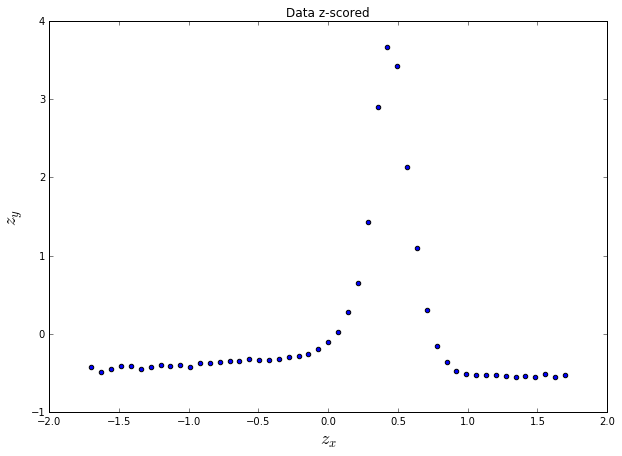

In [4]:
plt.figure(figsize=(10,7))
plt.title('Data z-scored')
plt.scatter(df.x, df.y)
plt.xlabel(r'$z_x$', size=18)
plt.ylabel(r'$z_y$', size=18)
plt.show()

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [42]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

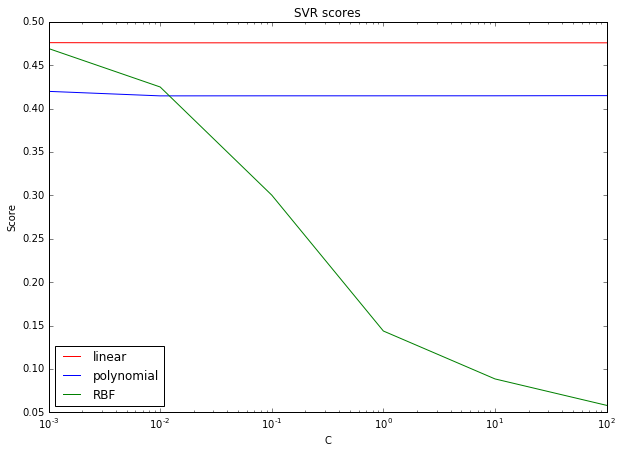

In [69]:
c_values = 10.0 ** np.arange(-3, 3)

x_new = df.x.reshape(len(df.x), 1)

linear_svr_scores = []
polynomial_svr_scores = []
rbf_svr_scores = []

def svr_score(svr, svr_scores):
    svr.fit(x_new, df.y)
    svr_scores.append(mean_absolute_error(df.y, svr.predict(x_new)))
    
for c in c_values:
    svr_score(SVR(C=c, epsilon=0.01, kernel='linear'), linear_svr_scores)
    svr_score(SVR(C=c, epsilon=0.01, kernel='poly', degree=3, gamma=6, coef0=1), polynomial_svr_scores)
    svr_score(SVR(C=c, epsilon=0.01, kernel='rbf', gamma=6, coef0=1), rbf_svr_scores)

plt.figure(figsize=(10,7))
plt.title('SVR scores')
plt.xlabel('C')
plt.ylabel('Score')
plt.plot(c_values, linear_svr_scores, label='linear', color='r')
plt.plot(c_values, polynomial_svr_scores, label='polynomial', color='b')
plt.plot(c_values, rbf_svr_scores, label='RBF', color='g')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

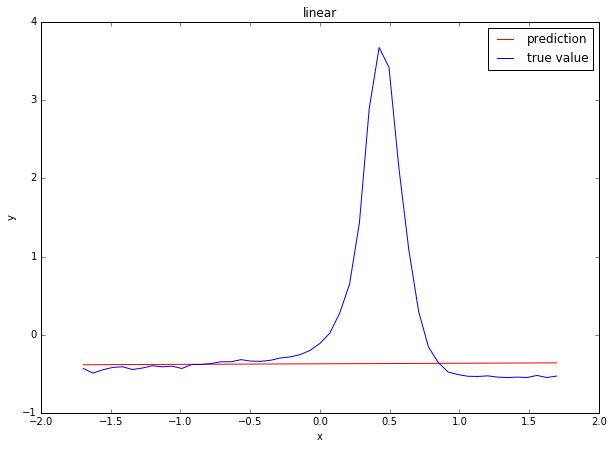

In [71]:
c_best_linear = c_values[np.argmin(linear_svr_scores)]
svr_linear = SVR(C=c_best_linear, epsilon=0.01, kernel='linear')
svr_linear.fit(x_new, df.y)

plt.figure(figsize=(10,7))
plt.title('linear')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(df.x, svr_linear.predict(x_new), label='prediction', color='r')
plt.plot(df.x, df.y, label='true value', color='b')
plt.legend(loc='best')
plt.show()

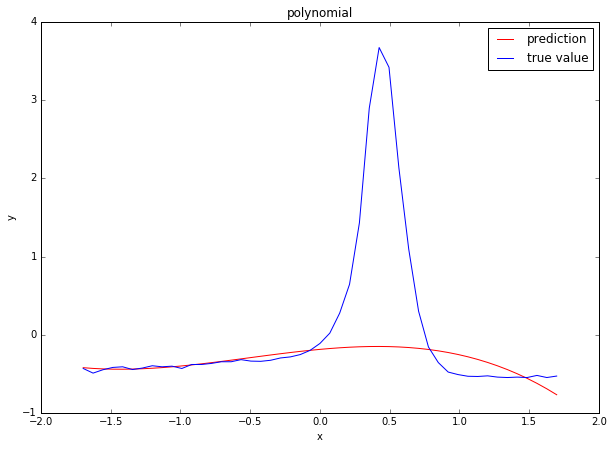

In [73]:
c_best_polynomial = c_values[np.argmin(polynomial_svr_scores)]
svr_polynomial = SVR(C=c_best_polynomial, epsilon=0.01, kernel='poly', degree=3, gamma=6, coef0=1)
svr_polynomial.fit(x_new, df.y)

plt.figure(figsize=(10,7))
plt.title('polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(df.x, svr_polynomial.predict(x_new), label='prediction', color='r')
plt.plot(df.x, df.y, label='true value', color='b')
plt.legend(loc='best')
plt.show()

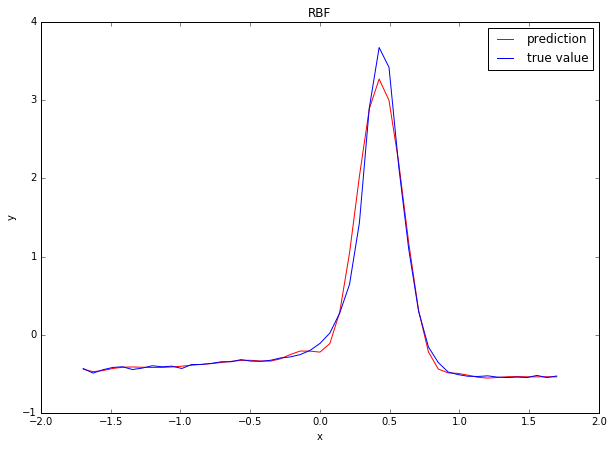

In [75]:
c_best_rbf = c_values[np.argmin(rbf_svr_scores)]
svr_rbf = SVR(C=c, epsilon=0.01, kernel='rbf', gamma=6, coef0=1)
svr_rbf.fit(x_new, df.y)

plt.figure(figsize=(10,7))
plt.title('RBF')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(df.x, svr_rbf.predict(x_new), label='prediction', color='r')
plt.plot(df.x, df.y, label='true value', color='b')
plt.legend(loc='best')
plt.show()

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [3]:
df_es = pd.read_csv(zipfile.ZipFile('data.zip').open('war_and_peace_es.txt'))
df_es.columns = ['word']
first_row = pd.DataFrame({'word': ['guerra']})
df_es = first_row.append(df_es, ignore_index=True)
df_es.insert(1, 'label', 0)
df_es.head()

word  label
0    guerra      0
1      pace      0
2       lev      0
3  nicoevic      0
4    tolstj      0

In [4]:
df_en = pd.read_csv(zipfile.ZipFile('data.zip').open('war_and_peace_en.txt'))
df_en.columns = ['word']
first_row = pd.DataFrame({'word': ['war']})
df_en = first_row.append(df_en, ignore_index=True)
df_en.insert(1, 'label', 1)
df_en.head()

word  label
0      war      1
1      and      1
2    peace      1
3      leo      1
4  tolstoy      1

In [5]:
df = df_es.append(df_en, ignore_index=True)
df.head()

word  label
0    guerra      0
1      pace      0
2       lev      0
3  nicoevic      0
4    tolstj      0

In [6]:
df.tail()

word  label
11398         leave      1
11399           her      1
11400          task      1
11401           was      1
11402  accomplished      1

## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [7]:
from sklearn.cross_validation import train_test_split

In [11]:
RND_SEED = np.random.seed()
df_sample = df.sample(n=1000, random_state=RND_SEED).reset_index(drop=True)
df_sample.head()

word  label
0       compiere      0
1            for      1
2            his      1
3  evidentemente      0
4            was      1

In [1]:
X = np.arange(df_sample.shape[0])
X_train, X_test = train_test_split(X, test_size=0.4)
y_train, y_test = df_sample.ix[X_train].label.values, df_sample.ix[X_test].label.values

NameError: name 'np' is not defined

In [13]:
print(X_train)
print(y_train)

[654  27 290 684 811 231 401 857 374 951  89 257 497 453 833 195 895 159
 695 353   9 395  22 936 270  50 979 866 228 932 715 647 518  83 407 980
   0 935 557 574 284 972  18 984 821 581 659 590 303 804  17 909 586 991
 215 578 965 146 879 545 562 990 619 370 803 675 412 142 435 136 386 714
 920 959 524 828 922 154 802 608 517 528 859 612 556 873 641 124 384 746
  21 713 219 888 495  41  69  87  97 286 572 485 452  85 995 701 704  95
 445 712 109 357 265 392 165 606  54 378 382  82 776 430 667  65 225 761
 559  79 285 300 921 748  62 883 887 119 289 706 787  24 263 754 657 110
 436  39 925 398 916  75 911 974 308 835 585  19 820 832 727 773 843 753
 540 112 473 565 171 750 482 100  57 202 583 690 923 409 164 535 125 521
 456 943 751 736  90 537 108 149 476 280 604 440 194 582  13 469 192 496
 168 439 861 461 962 520 480 794 817 505 278 617 385 388 852 127 864  49
 567 389 912 672 344 236 465 267 688  12 548 429 503 973 350 176  88 613
 960 639 587  42 793 196 546 759  81 665 824 470 74

In [14]:
print(X_test)
print(y_test)

[703 708  14 413 792 145 664 381 425 466 441 958 178 982   4 405  76 618
 531 553  86 433 945 660  48 933 737 172 729 243 896 365 635 881 798 831
 224 106 597 472 458 399 886 104 680 191 283 506 543 838  26 621 299 444
 478 244 534 189 733  35 566 230 629 871 363 483 331 686 516 259 362 862
 414 908 858 115 576 605 800 298 904 262 126 314 352 218 251 121 256  96
 970 333 906 438 486 775 197 891 593 343 186 907  56 655 743 492 642 160
 241 863 623 208 418 807 739 526 380 187 416 771 892 406 937 511 939 978
 232 758 549 730 216 625 237 522 221 544 952 648 851 676 538 620 372 420
 161  25 222 428 910 955  36 424  38 327 942 789 101 999 120 740 577 272
  51 756 504 103 779 234  59 905 364 321 484 918 432 976 198 694 322 711
  98 111 717 651  66 830 880 368 643 190 569 188  93 924 650 634 223 550
 375 499 630 897 513 564 876 137 610 954 422 644 763 692 337 940 601 150
 235 207 315 233 184 153 796 275 329 785 915 554 396 685  32 293 998 782
 426 170 570 602 199 868 117  52 320 393 295 210 31

## Расчет ядра (3 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [15]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

In [16]:
def string_kernel(U, V):
    G = [[0 for j in range(len(V))] for i in range(len(U))]
    for i in range(len(U)):
        for j in range(len(V)):
            G[i][j] = np.exp(-wfi_levenshtein(df_sample.word[U[i]], df_sample.word[V[j]]) ** 2)
    return G

In [19]:
G = string_kernel(X_train, X_train)
print(G)

[[1.0, 5.2428856633634639e-22, 5.2428856633634639e-22, 1.3887943864964021e-11, 5.2428856633634639e-22, 2.3195228302435696e-16, 2.3195228302435696e-16, 2.3195228302435696e-16, 1.6038108905486379e-28, 5.2428856633634639e-22, 5.2428856633634639e-22, 1.3887943864964021e-11, 3.7200759760208361e-44, 1.3887943864964021e-11, 5.2428856633634639e-22, 2.3195228302435696e-16, 5.2428856633634639e-22, 5.2428856633634639e-22, 5.2428856633634639e-22, 2.3195228302435696e-16, 5.2428856633634639e-22, 5.2428856633634639e-22, 1.3887943864964021e-11, 2.3195228302435696e-16, 5.2428856633634639e-22, 5.2428856633634639e-22, 1.6038108905486379e-28, 2.3195228302435696e-16, 2.3195228302435696e-16, 1.3887943864964021e-11, 1.3887943864964021e-11, 5.2428856633634639e-22, 5.2428856633634639e-22, 6.6396771995807348e-36, 5.2428856633634639e-22, 2.3195228302435696e-16, 5.2428856633634639e-22, 2.3195228302435696e-16, 5.2428856633634639e-22, 5.2428856633634639e-22, 6.6396771995807348e-36, 5.2428856633634639e-22, 2.3195228

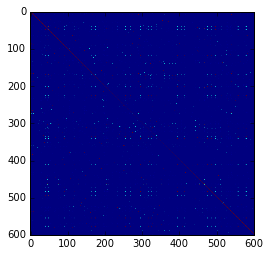

In [20]:
plt.figure(figsize=(10, 7))
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.